In [1]:
import pandas as pd 
import numpy as np 
import random 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

In [ ]:
fraud_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv')
fraud_data.head()

In [3]:
fraud_data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,...,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,...,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,...,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.00000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282062e+06,0.000000,7.288450e+06,68.017000,9749.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.00000,15.000000,339.000000,484.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429699e+06,0.000000,1.123918e+07,117.000000,14223.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.00000,15.000000,427.000000,533.000000,554.000000,14.000000,15.000000,361.000000,169.000000,32.000000
max,3.577536e+06,1.000000,1.581105e+07,5279.950000,18390.000000,600.000000,229.000000,237.000000,536.000000,102.000000,...,225.00000,29.000000,670.000000,660.000000,854.000000,43.000000,24.000000,548.000000,216.000000,32.000000


In [4]:
fraud_data.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
id_36             44849
id_37             44849
id_38             44849
DeviceType        44869
DeviceInfo        47133
Length: 434, dtype: int64

In [5]:
fraud_data.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [6]:
fraud_data.isFraud.value_counts(normalize = True)

0    0.966048
1    0.033952
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

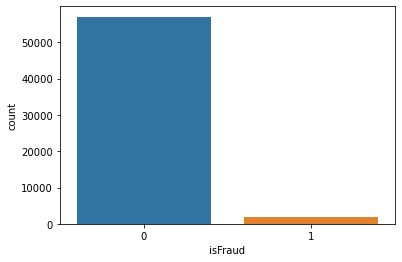

In [7]:
sns.countplot(fraud_data.isFraud)

In [8]:
#missing values
def miss_val_info(df):
    """
    This function will take a dataframe and calculates the frequency and percentage of missing values in each column.
    """
    missing_count = df.isnull().sum().sort_values(ascending = False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    missing_info = pd.concat([missing_count, missing_percent], axis = 1, keys=['Missing Value Count','Percent of missing values'])
    return missing_info[missing_info['Missing Value Count'] != 0]

In [9]:
miss_val_info(fraud_data)

,Missing Value Count,Percent of missing values
id_24,58567,99.18
id_25,58530,99.11
id_26,58529,99.11
id_21,58529,99.11
id_22,58529,99.11
...,...,...
V316,3,0.01
V317,3,0.01
V318,3,0.01
V319,3,0.01


In [10]:
fraud_data = fraud_data[fraud_data.columns[fraud_data.isnull().mean() < 0.2]]

In [11]:
# filling missing values of numerical columns with mean value.
num_cols = fraud_data.select_dtypes(include=np.number).columns # getting all the numerical columns

fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean()) # fills the missing values with mean

In [12]:
cat_cols = fraud_data.select_dtypes(include = 'object').columns # getting all the categorical columns

fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) # fills the missing values with maximum occuring element in the column

In [13]:
fraud_data.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V317              0
V318              0
V319              0
V320              0
V321              0
Length: 182, dtype: int64

In [14]:
# one hot encoding
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
# Separate input features and output feature
X = fraud_data.drop(columns = ['isFraud']) # input features
Y = fraud_data.isFraud # output feature

from sklearn.model_selection import train_test_split

# Split randomly into 70% train data and 30% test data
X_train, X_Test, Y_train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [19]:
# dealing with imbalanced data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)

In [20]:
X_train, Y_train = sm.fit_resample(X_train, Y_train)
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([39944, 39944]))

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')

In [22]:
rfc.fit(X_train, Y_train)
rfc.score(X_Test, Y_Test)

0.9751650956708247

In [23]:
# feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, Y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [25]:
rfc.score(X_test, Y_test)

0.969265938531877